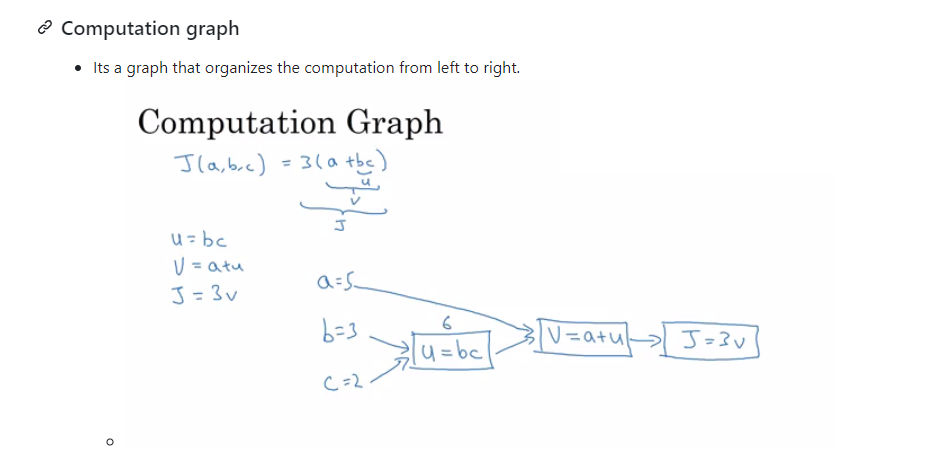

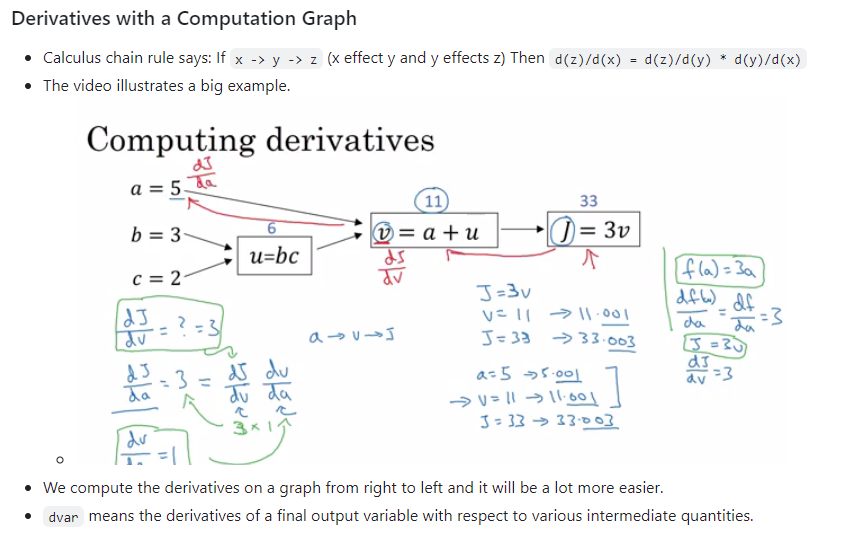

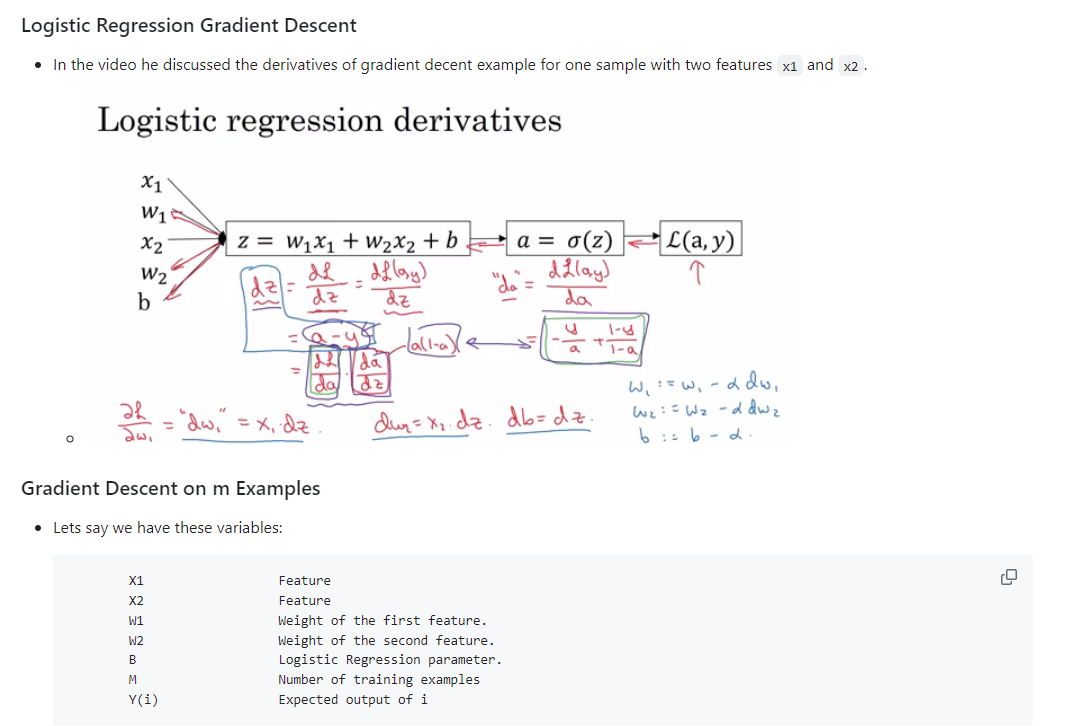

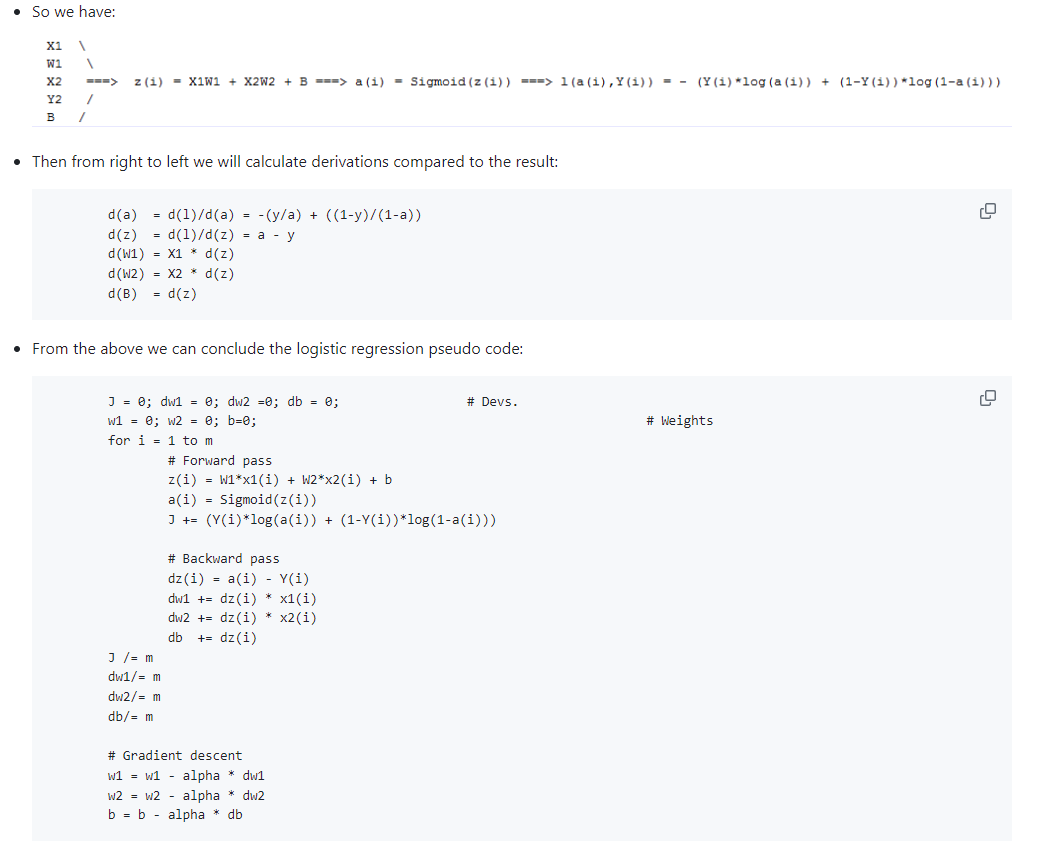

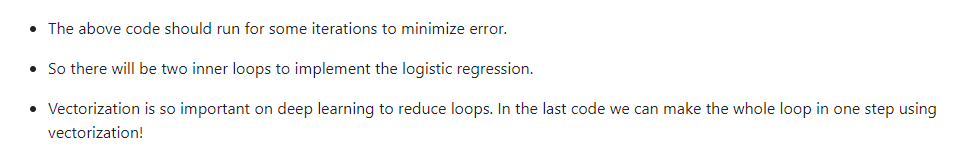

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_gradient_descent(x1, x2, Y, alpha, num_iterations):
    m = len(Y)
    w1 = 0
    w2 = 0
    b = 0

    for _ in range(num_iterations):
        J = 0
        dw1 = 0
        dw2 = 0
        db = 0

        for i in range(m):
            # Forward pass
            z = w1 * x1[i] + w2 * x2[i] + b
            a = sigmoid(z)
            J += (Y[i] * np.log(a) + (1 - Y[i]) * np.log(1 - a))

            # Backward pass
            dz = a - Y[i]
            dw1 += dz * x1[i]
            dw2 += dz * x2[i]
            db += dz

        # Average cost function and gradients over all examples
        J /= -m
        dw1 /= m
        dw2 /= m
        db /= m

        # Gradient descent
        w1 = w1 - alpha * dw1
        w2 = w2 - alpha * dw2
        b = b - alpha * db

        # Print the cost every 100 iterations
        if _ % 100 == 0:
            print(f'Cost after iteration {_}: {J}')

    return w1, w2, b

# Example usage:
x1 = np.array([1, 2, 3, 4, 5])   # Example feature 1 values
x2 = np.array([2, 3, 4, 5, 6])   # Example feature 2 values
Y = np.array([0, 0, 1, 1, 1])    # Example labels
alpha = 0.01                     # Learning rate
num_iterations = 1000            # Number of iterations

w1, w2, b = logistic_regression_gradient_descent(x1, x2, Y, alpha, num_iterations)

print(f'Optimized weights: w1 = {w1}, w2 = {w2}, bias = {b}')

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5381528735124566
Cost after iteration 200: 0.5135283026832702
Cost after iteration 300: 0.4908909346531941
Cost after iteration 400: 0.4700714068053358
Cost after iteration 500: 0.450910529183113
Cost after iteration 600: 0.4332588653514889
Cost after iteration 700: 0.41697773492773615
Cost after iteration 800: 0.4019396063778606
Cost after iteration 900: 0.388028037848281
Optimized weights: w1 = 0.8909313257519401, w2 = -0.15949398160290384, bias = -1.0504253073548444


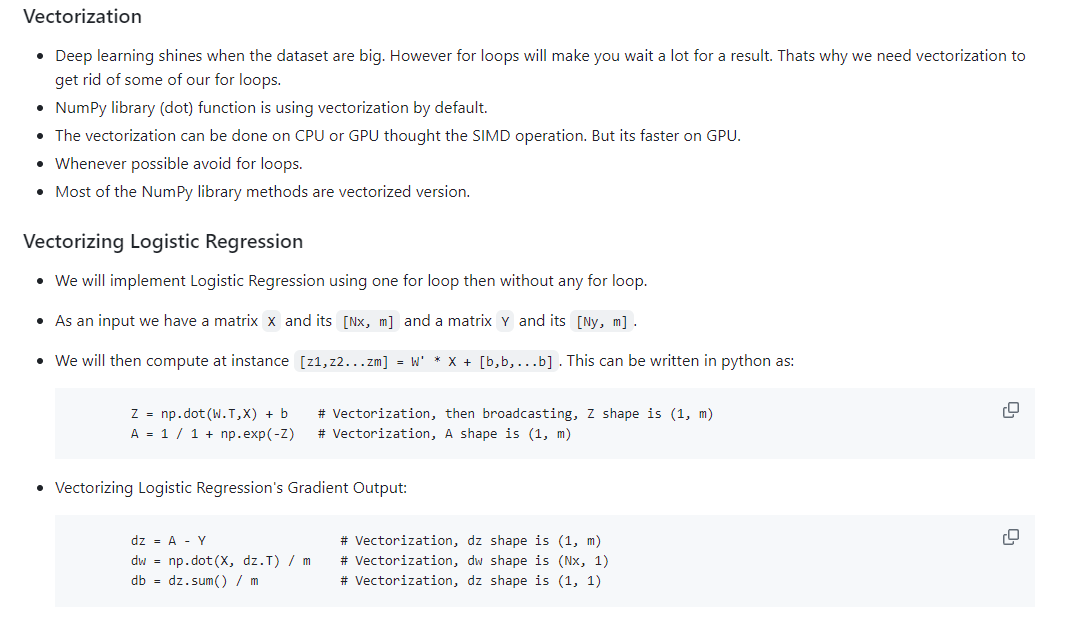

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_gradient_descent_vectorized(X, Y, alpha, num_iterations):
    m = X.shape[1]  # Number of training examples
    n = X.shape[0]  # Number of features

    # Initialize weights and bias
    W = np.zeros((n, 1))
    b = 0

    for _ in range(num_iterations):
        # Forward pass
        Z = np.dot(W.T, X) + b  # Vectorized forward pass
        A = sigmoid(Z)          # Vectorized activation function

        # Compute cost (cross-entropy)
        J = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

        # Backward pass
        dz = A - Y
        dw = (1/m) * np.dot(X, dz.T)  # Vectorized gradient of weights
        db = np.sum(dz) / m           # Vectorized gradient of bias

        # Update weights and bias
        W = W - alpha * dw
        b = b - alpha * db

        # Print the cost every 100 iterations
        if _ % 100 == 0:
            print(f'Cost after iteration {_}: {J}')

    return W, b

# Example usage:
X = np.array([[1, 2, 3, 4, 5],    # Feature 1 values
              [2, 3, 4, 5, 6]])   # Feature 2 values
Y = np.array([[0, 0, 1, 1, 1]])   # Labels (1 x m)
alpha = 0.01                     # Learning rate
num_iterations = 1000            # Number of iterations

# Call the vectorized logistic regression gradient descent function
W, b = logistic_regression_gradient_descent_vectorized(X, Y, alpha, num_iterations)

print(f'Optimized weights: W = {W.flatten()}, b = {b}')

Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.5381528735124566
Cost after iteration 200: 0.5135283026832703
Cost after iteration 300: 0.49089093465319417
Cost after iteration 400: 0.4700714068053358
Cost after iteration 500: 0.45091052918311303
Cost after iteration 600: 0.4332588653514889
Cost after iteration 700: 0.41697773492773615
Cost after iteration 800: 0.4019396063778605
Cost after iteration 900: 0.388028037848281
Optimized weights: W = [ 0.89093133 -0.15949398], b = -1.0504253073548444


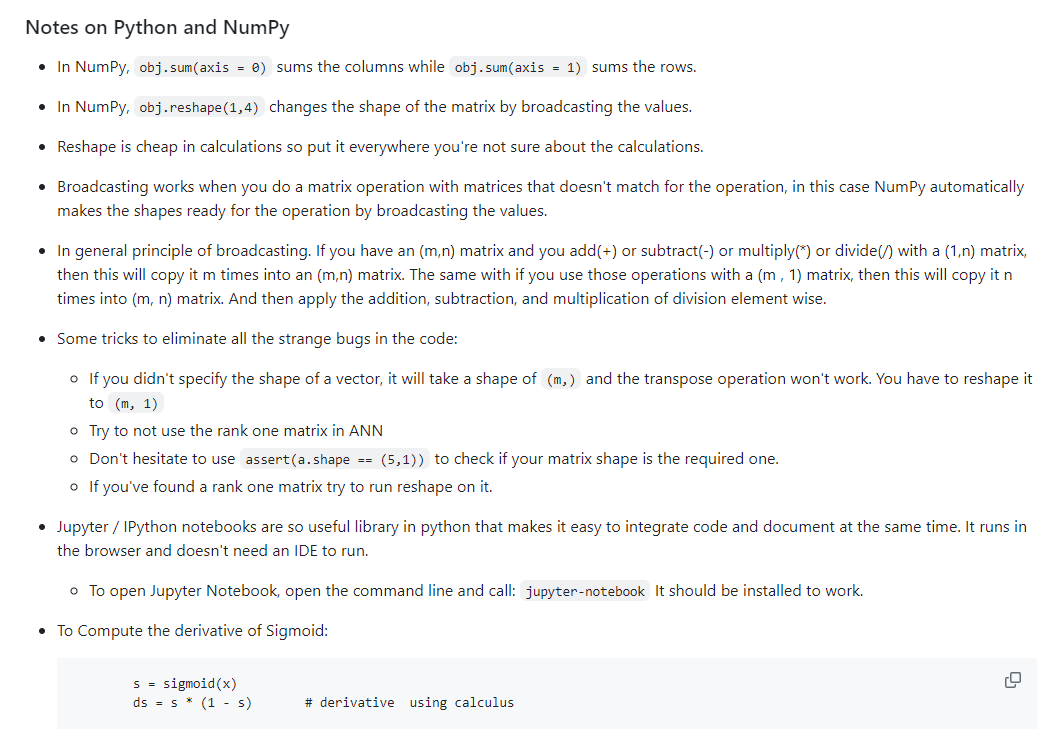

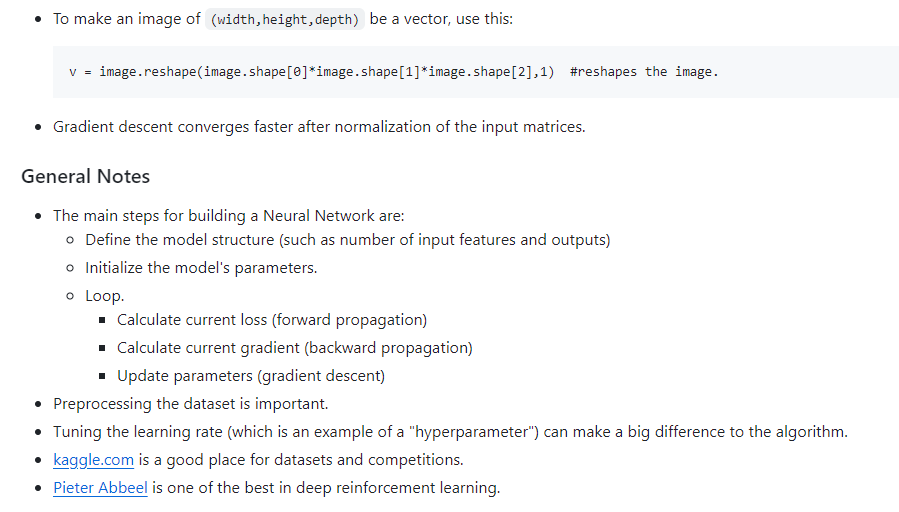

#Shallow neural networks


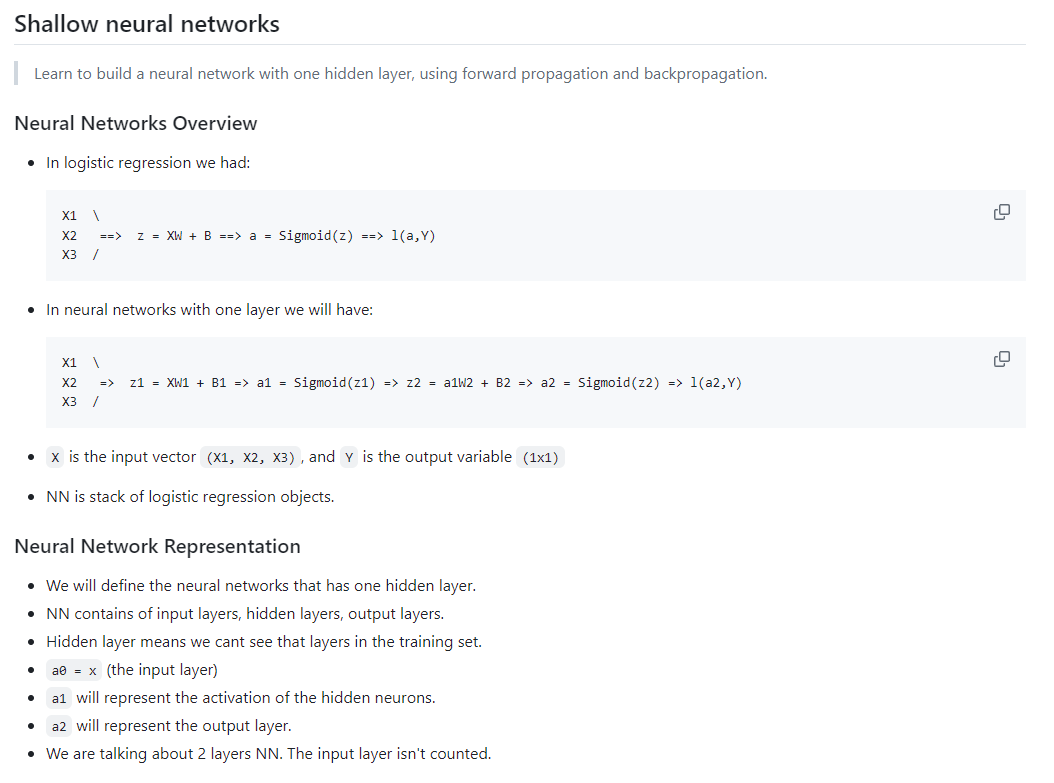

#Computing a Neural Network's Output


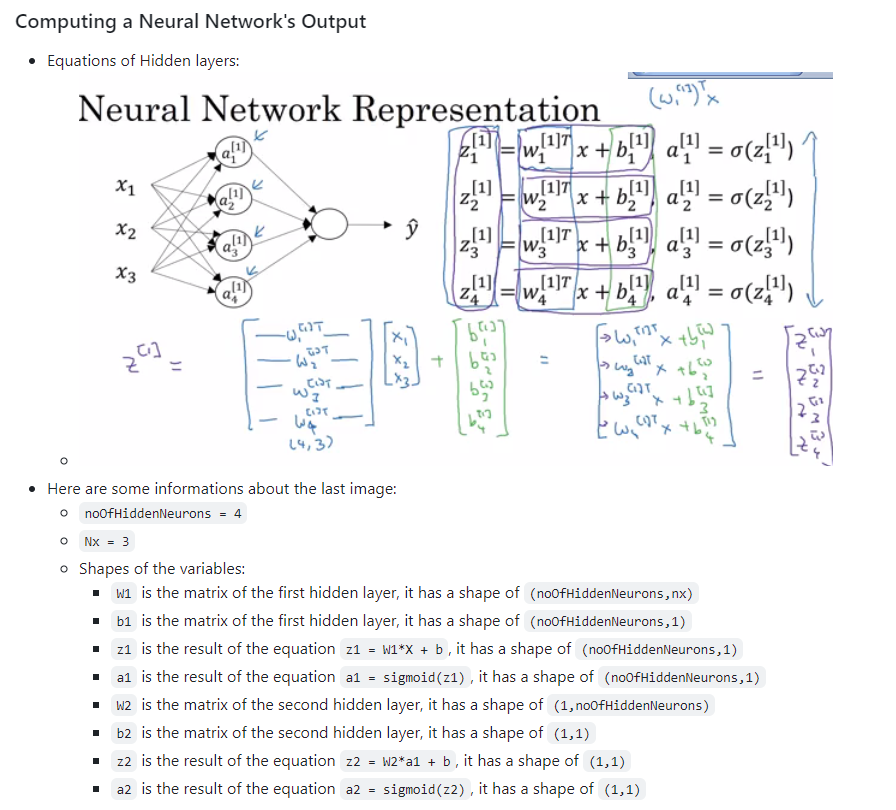

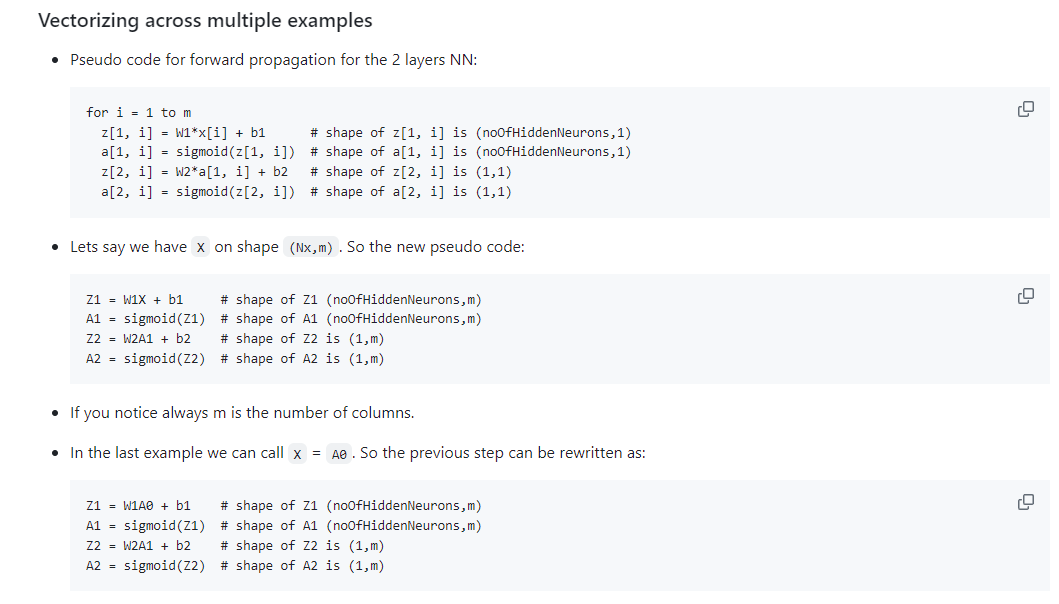

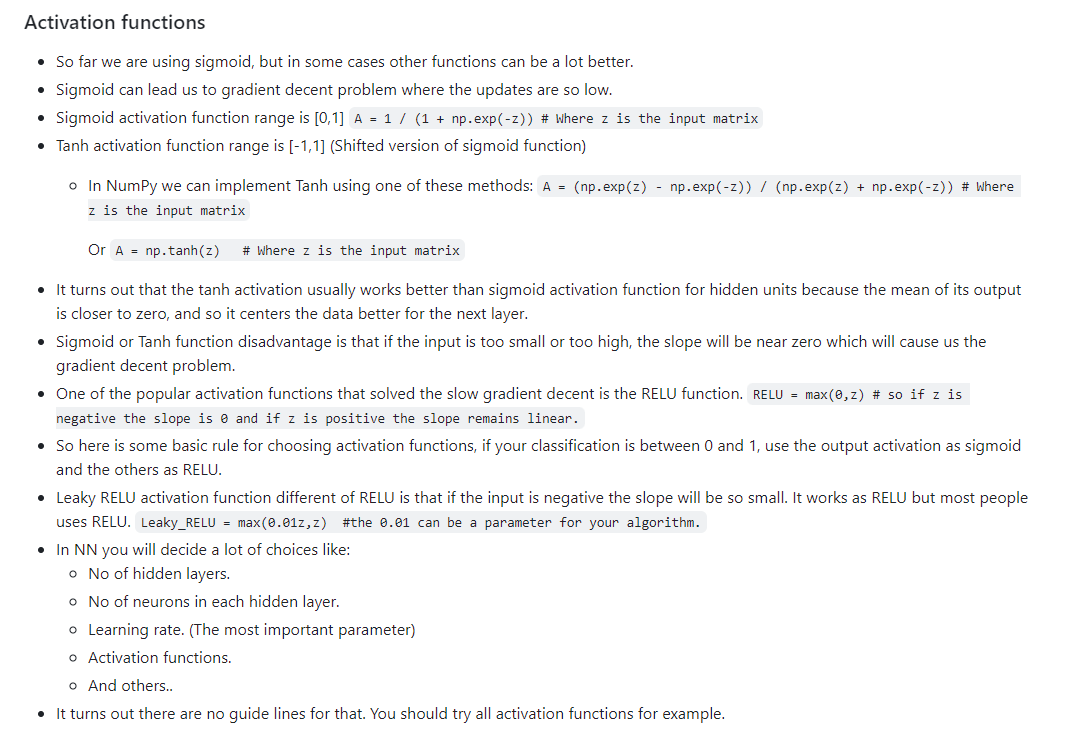

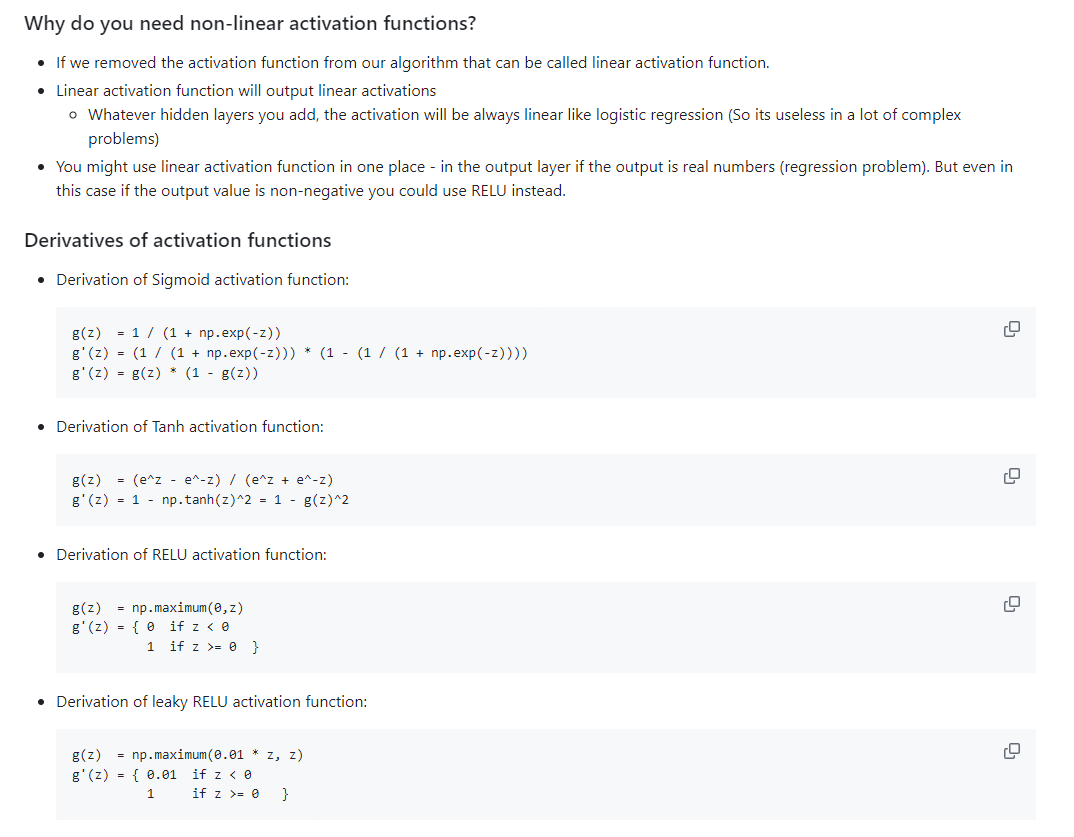

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    sig = sigmoid(z)
    return sig * (1 - sig)

def tanh_derivative(z):
    tanh_z = np.tanh(z)
    return 1 - tanh_z**2

def relu_derivative(z):
    return np.where(z >= 0, 1, 0)

def leaky_relu_derivative(z, alpha=0.01):
    return np.where(z >= 0, 1, alpha)

# Test the derivative functions
z = np.array([-1, 0, 1])

# Derivative of sigmoid
sig_der = sigmoid_derivative(z)
print("Sigmoid derivative:", sig_der)

# Derivative of tanh
tanh_der = tanh_derivative(z)
print("Tanh derivative:", tanh_der)

# Derivative of ReLU
relu_der = relu_derivative(z)
print("ReLU derivative:", relu_der)

# Derivative of Leaky ReLU
leaky_relu_der = leaky_relu_derivative(z)
print("Leaky ReLU derivative (default alpha=0.01):", leaky_relu_der)

Sigmoid derivative: [0.19661193 0.25       0.19661193]
Tanh derivative: [0.41997434 1.         0.41997434]
ReLU derivative: [0 1 1]
Leaky ReLU derivative (default alpha=0.01): [0.01 1.   1.  ]


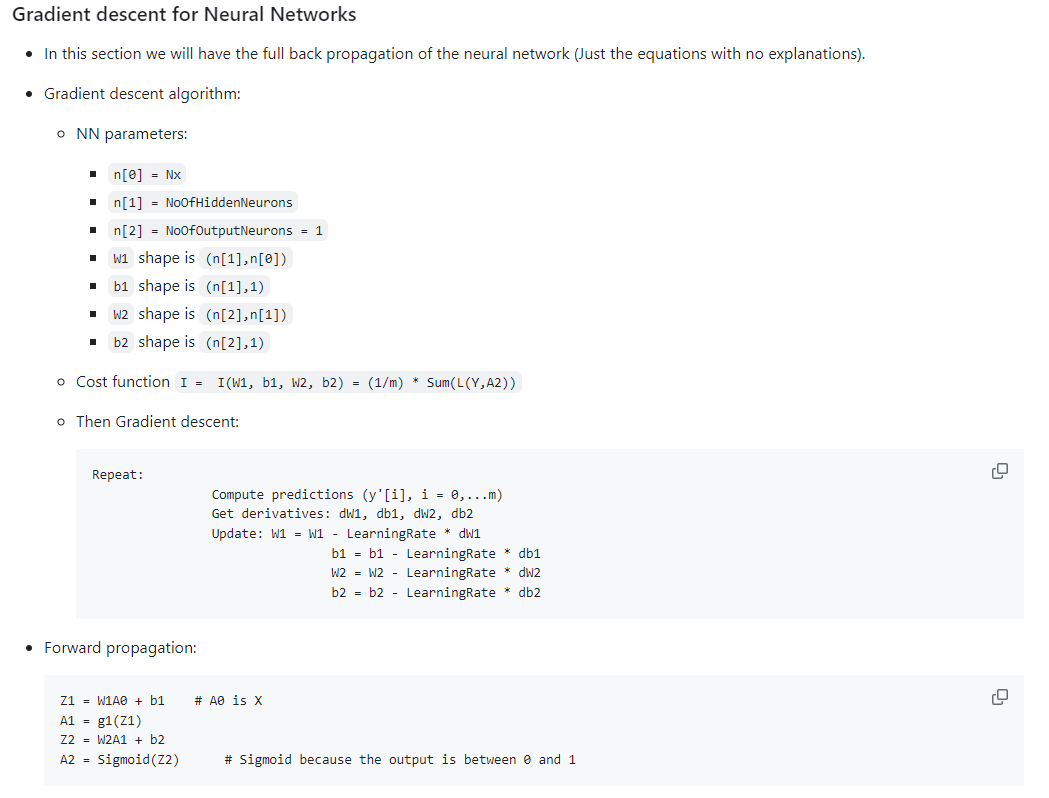

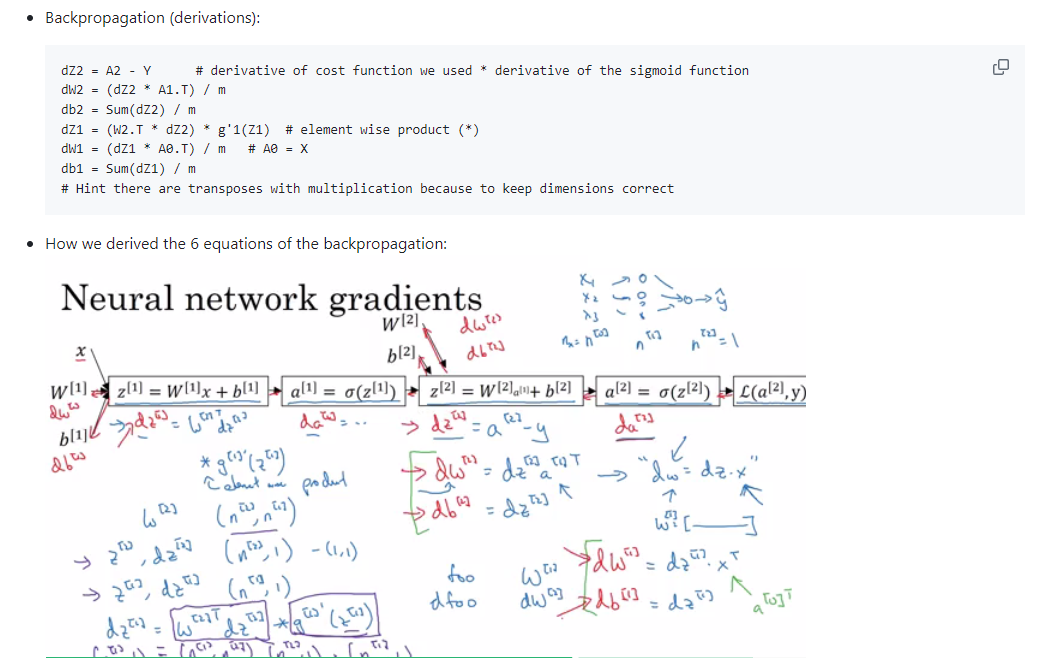

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01
        self.b2 = np.zeros((output_size, 1))

    def forward_propagation(self, X):
        # Forward pass through the network
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = np.tanh(self.Z1)  # Activation function (tanh) for hidden layer

        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = sigmoid(self.Z2)  # Activation function (sigmoid) for output layer

        return self.A2

    def compute_loss(self, Y):
        # Compute the mean squared error loss
        m = Y.shape[1]
        loss = -np.sum(Y * np.log(self.A2) + (1 - Y) * np.log(1 - self.A2)) / m
        return loss

    def backward_propagation(self, X, Y):
        m = Y.shape[1]

        # Backward pass: compute gradients
        dZ2 = self.A2 - Y
        dW2 = np.dot(dZ2, self.A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m

        dZ1 = np.dot(self.W2.T, dZ2) * (1 - np.power(self.A1, 2))  # Derivative of tanh
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m

        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        # Gradient descent update
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, Y, learning_rate=0.01, num_iterations=1000):
        for i in range(num_iterations):
            # Forward propagation
            self.forward_propagation(X)

            # Compute loss
            loss = self.compute_loss(Y)

            # Backward propagation
            dW1, db1, dW2, db2 = self.backward_propagation(X, Y)

            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)

            # Print loss every 100 iterations
            if i % 100 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X):
        # Make predictions (forward propagation)
        predictions = self.forward_propagation(X)
        return predictions

# Example usage:
# Generate synthetic dataset
np.random.seed(42)
X = np.random.randn(5, 1000)  # 5 features, 1000 samples
Y = np.random.randint(0, 2, (1, 1000))  # Binary labels (0 or 1)

# Initialize and train the neural network
input_size = 5
hidden_size = 4
output_size = 1

nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X, Y, learning_rate=0.1, num_iterations=1000)

# Make predictions on new data
X_new = np.random.randn(5, 10)  # New data (10 samples)
predictions = nn.predict(X_new)
print("Predictions:", predictions)

Iteration 0, Loss: 0.6931505404318482
Iteration 100, Loss: 0.693091381865138
Iteration 200, Loss: 0.6930789256629867
Iteration 300, Loss: 0.6930587875105013
Iteration 400, Loss: 0.6930221977996637
Iteration 500, Loss: 0.6929549390074202
Iteration 600, Loss: 0.6928345784348944
Iteration 700, Loss: 0.6926319402158787
Iteration 800, Loss: 0.69232514971753
Iteration 900, Loss: 0.6919307497034297
Predictions: [[0.5009902  0.49122982 0.49623747 0.50811205 0.49954602 0.51565487
  0.49691739 0.49809416 0.49586517 0.47249997]]


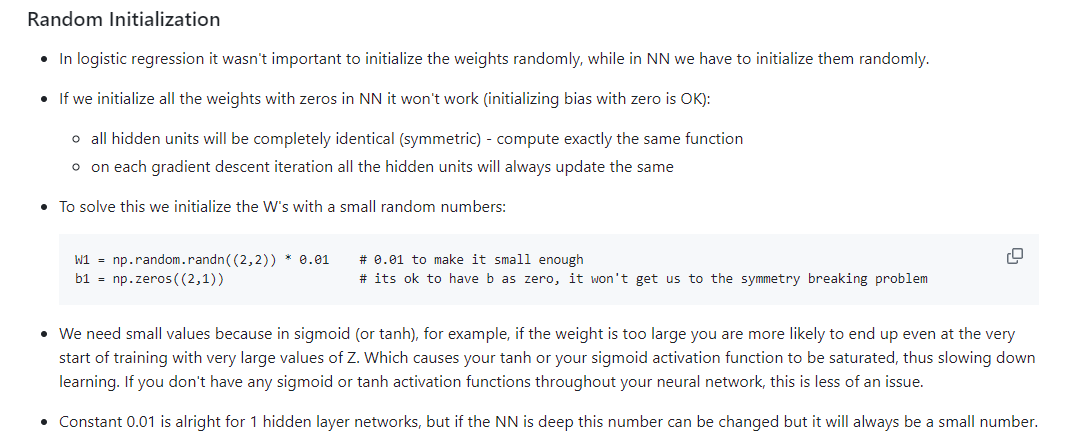